In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0F8rtF0Q8QsBh7H2d1Jv")
project = rf.workspace("processamento-de-imagem-aula").project("my-first-project-lzc3k")
version = project.version(6)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to My-First-Project-6 in yolov5pytorch:: 100%|██████████| 1616/1616 [00:00<00:00, 4148.06it/s]


In [2]:
!pip install inference-sdk roboflow opencv-python pillow matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.11.0.86
    Uninstalling opencv-python-4.11.0.86:
      Successfully uninstalled opencv-python-4.11.0.86
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.11.15
    Uninstalling aiohttp-3.11.15:
      Successfully uninstalled aiohttp-3.11.15


In [3]:
!pip install inference-sdk


loading Roboflow workspace...
loading Roboflow project...


Saving 20220527T115106.jpg to 20220527T115106.jpg


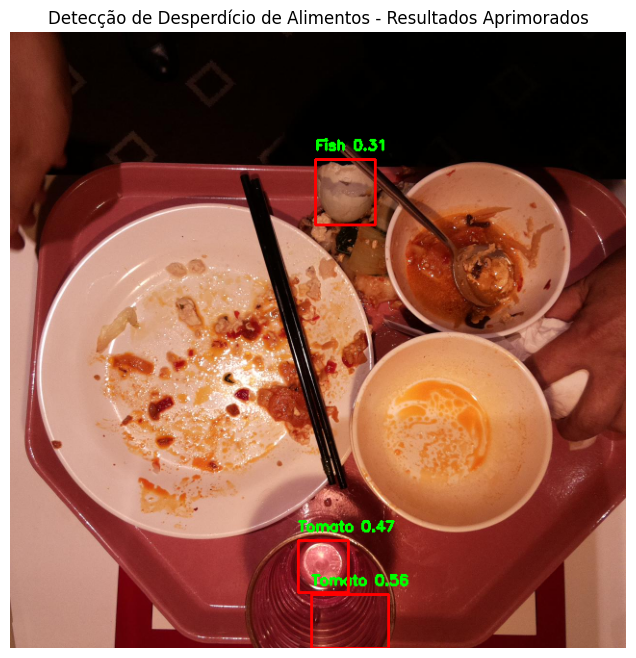

🍽️ Itens detectados como desperdício:
1. Tomato - Confiança: 0.56
2. Tomato - Confiança: 0.47
3. Fish - Confiança: 0.31


In [7]:
from roboflow import Roboflow
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from google.colab import files

# Configuração Roboflow
rf = Roboflow(api_key="0F8rtF0Q8QsBh7H2d1Jv")
project = rf.workspace("processamento-de-imagem-aula").project("my-first-project-lzc3k")
model = project.version(2).model

# Carregar imagem
uploaded = files.upload()
image_path = next(iter(uploaded.keys()))
image = Image.open(image_path)
image_np = np.array(image)

# Ajustes para melhor detecção
def enhance_detection(image):
    # Pré-processamento básico
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Converter para BGR
    image = cv2.resize(image, (640, 640))  # Redimensionar
    return image

# Processar imagem
processed_img = enhance_detection(image_np)

# Predição com parâmetros otimizados
prediction = model.predict(processed_img,
                         confidence=30,  # Limite mais baixo para capturar mais detecções
                         overlap=25).json()

# Visualização melhorada
def visualize_detections(image, predictions):
    img = image.copy()
    for pred in predictions['predictions']:
        x, y, w, h = int(pred['x']), int(pred['y']), int(pred['width']), int(pred['height'])
        cv2.rectangle(img, (x-w//2, y-h//2), (x+w//2, y+h//2), (0, 0, 255), 2)
        label = f"{pred['class']} {pred['confidence']:.2f}"
        cv2.putText(img, label, (x-w//2, y-h//2-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return img

# Mostrar resultados
if len(prediction['predictions']) > 0:
    result_img = visualize_detections(processed_img, prediction)
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Detecção de Desperdício de Alimentos - Resultados Aprimorados')
    plt.show()

    print("🍽️ Itens detectados como desperdício:")
    for i, pred in enumerate(prediction['predictions'], 1):
        print(f"{i}. {pred['class']} - Confiança: {pred['confidence']:.2f}")
else:
    print("⚠️ ATENÇÃO: Nenhum desperdício detectado, mas você pode tentar:")
    print("1. Diminuir o limiar de confiança (atual: 30)")
    print("2. Verificar se o alimento está visível na imagem")
    print("3. Treinar o modelo com mais exemplos similares")
    plt.imshow(cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Sua imagem (sem detecções)')
    plt.show()